In [117]:
import sys
import os
sys.path.insert(0, os.getcwd()+"/Utils")
import PolyTurk as pt
TRIAL_ID = 8
MASK_PATH = '/home/andrew/ImageSegmentation/Training/Trial'+str(TRIAL_ID)+'/masks/'
IMG_PATH = '/home/andrew/ImageSegmentation/Training/Raw_Images_1024/'

trial_inputs = {
    'TRIAL_ID': TRIAL_ID,
    'MASK_PATH': MASK_PATH,
    'IMG_PATH': IMG_PATH
}

## Initialize Turk object

In [118]:
turk = pt.Turk(trial_inputs)

Number of HITs: 209
Reviewable Assignments: 33


In [119]:
trial_data = turk.getTaskData()

## Preview Results

In [121]:
import pandas as pd
from IPython.display import HTML
from PIL import Image
from io import BytesIO
import base64

pd.set_option('display.max_colwidth', -1)

def get_thumbnail(paths):
    bg = Image.open(paths[0])
    rgbimg = Image.new("RGBA", bg.size)
    rgbimg.paste(bg)
    fg = Image.open(paths[1])
    rgbimg.paste(fg, (0, 0), fg)
    rgbimg.thumbnail((150, 150), Image.LANCZOS)
    return rgbimg

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'png')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

df = pd.DataFrame(trial_data)
df = df.drop(columns=['Answer'], axis=1)


#qgrid_widget = qgrid.show_grid(df.groupby('Worker'), show_toolbar=True)
#qgrid_widget
dfworker = df.groupby(['Worker','AssignmentID'])
dfworker.first()

import qgrid
qgrid_widget=qgrid.show_grid(dfworker.first(),show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [107]:
dfworker['AssignmentID'].first()

Worker          AssignmentID                  
A234WZ4KX8IW07  3IGI0VL647KA8KTK7I47QJYCZTVNOF    3IGI0VL647KA8KTK7I47QJYCZTVNOF
                3K772S5NP8BWMXUKA66YGN729GNEH2    3K772S5NP8BWMXUKA66YGN729GNEH2
                3LOZAJ85YDD1D7IJMQTJH8M703MX2I    3LOZAJ85YDD1D7IJMQTJH8M703MX2I
                3LYA37P8IQNPHKJ86075S7H9YZ9KB5    3LYA37P8IQNPHKJ86075S7H9YZ9KB5
                3PDJHANYK5GS9I154ON04ZFPSHKH63    3PDJHANYK5GS9I154ON04ZFPSHKH63
                3U4J9857OEB1M5CON6IWO2CNSFI7BV    3U4J9857OEB1M5CON6IWO2CNSFI7BV
Name: AssignmentID, dtype: object

,Worker,Preview,Score,Approved
0,A2F9FURICZCOY3,,10,False
1,AF3K80U0YQJMZ,,10,False
2,A234WZ4KX8IW07,,10,False
3,AF3K80U0YQJMZ,,10,False
4,A2EBYJVHW8NGM2,,10,False
5,AF3K80U0YQJMZ,,10,False
6,AF3K80U0YQJMZ,,10,False
7,A1N52WM88S6JXY,,10,False
8,A234WZ4KX8IW07,,10,False
9,A2F9FURICZCOY3,,10,False

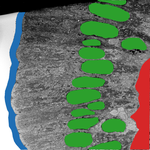
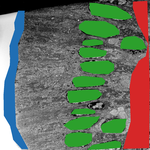
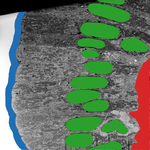
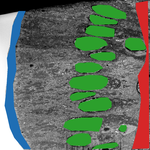
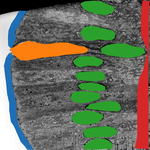
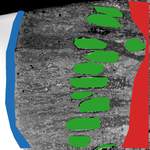
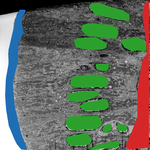
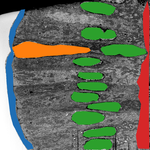
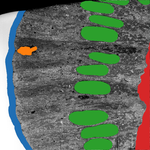
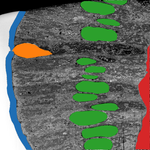
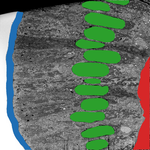
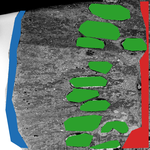
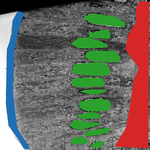
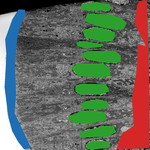
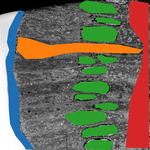
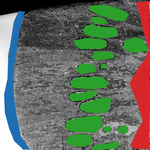
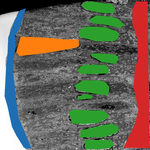
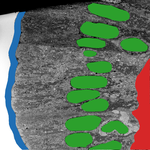
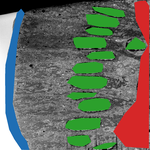
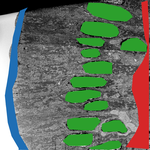
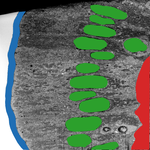
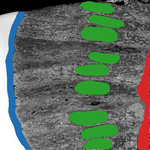
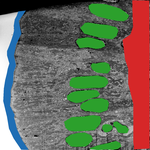
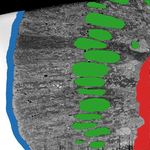
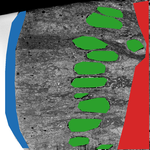
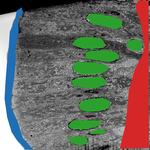
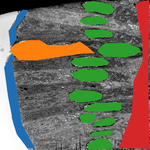
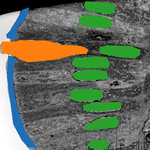
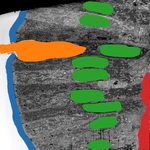
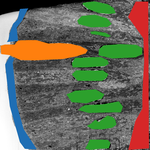
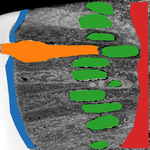
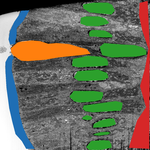
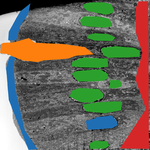

In [122]:
import pandas as pd
df = pd.DataFrame(trial_data)
df['URLs'] = df[['Image_Path', 'Mask_Path']].values.tolist()
df['Preview'] = df.URLs.map(lambda f: get_thumbnail(f))
#df.sort_values(by=['Worker'])
#df.pivot(index='Worker', columns='Image_ID', values='Avg_Poly_Verts')
HTML(df[['Worker', 'Preview','Score','Approved']].to_html(formatters={'Preview': image_formatter}, escape=False))
#df

In [ ]:
df